# Handwriting Recognition Using ANN:

## The dataset includes 1797 small images (8x8 pixels), each one includes a hand-written digit (0-9). There is a corresponding csv file that includes the labels of the images. The goal is to build an Artificial Neural Network that can recognize the hand-written digits.

In [8]:
%matplotlib inline

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd




# I will build	the	feature	matrix	and	label	vector: Each	image	is considered	as	a	data	sample with	pixels	as	features.	Thus,	to	build	the	feature	table	I	have	to	convert	each	8x8	image into	a	row	of	the	feature	matrix	with	64	feature	columns for 64	pixels.

In [9]:
labels = pd.read_csv('label.csv')

In [12]:
dfCols = np.append(np.arange(64), 'label')

df = pd.DataFrame(columns=dfCols)
pathToImage = 'Digit/'
for i in range(1797):
    img = mpimg.imread(pathToImage + str(i) + '.jpg')
    
    label = labels.get_value(i, 'digit')
    img = np.append(img, label)
    
    new_df = pd.DataFrame(img).transpose()
    new_df.columns = dfCols
    
    df = pd.concat([df, new_df])
    
    
df.reset_index(inplace=True)
df.drop(['index'], 1, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
0,0.0,2.0,88.0,217.0,158.0,21.0,0.0,0.0,16.0,0.0,...,0.0,4.0,3.0,87.0,228.0,182.0,0.0,9.0,2.0,0.0
1,0.0,0.0,11.0,187.0,210.0,78.0,5.0,0.0,13.0,5.0,...,0.0,0.0,0.0,0.0,172.0,251.0,157.0,0.0,12.0,1.0
2,0.0,0.0,5.0,59.0,240.0,199.0,2.0,0.0,5.0,0.0,...,0.0,0.0,11.0,0.0,54.0,173.0,255.0,138.0,0.0,2.0
3,6.0,0.0,108.0,255.0,213.0,13.0,10.0,0.0,2.0,131.0,...,1.0,0.0,0.0,118.0,217.0,226.0,159.0,0.0,3.0,3.0
4,0.0,6.0,0.0,34.0,160.0,7.0,7.0,0.0,5.0,0.0,...,0.0,0.0,0.0,2.0,42.0,250.0,51.0,0.0,4.0,4.0


In [13]:
X = df.drop('label', 1)
y = df['label']

# I  will use	sklearn	functions	to	split the	dataset	into	testing	and	training sets	with	the	following	parameters:	test_size=0.1,	random_state=2

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

# I will design	and	train	an	ANN	with	one	hidden	layer	with 80 neurons to	recognize	the	digits based	 on	 the	 training dataset	 that	 you	 I built. I will use random_state=1, learning_rate_init	 =	 0.002. Then, I will test	 your	 ANN	 on	 testing	 set,	 and	calculate	and	report	the	accuracy. Also,	I will calculate	and	report	the	Confusion	Matrix.

In [16]:
my_ANN = MLPClassifier(hidden_layer_sizes=(80,), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.002)


# Fit ANN
my_ANN.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(80,), learning_rate='constant',
       learning_rate_init=0.002, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [17]:
y_predict_ann = my_ANN.predict(X_test)
print(y_predict_ann)

[4. 0. 9. 1. 8. 7. 1. 5. 1. 6. 6. 7. 6. 1. 5. 5. 8. 6. 2. 7. 4. 6. 4. 1.
 5. 2. 9. 5. 4. 6. 5. 6. 3. 4. 0. 9. 9. 8. 4. 6. 8. 8. 5. 7. 9. 6. 9. 6.
 1. 3. 0. 1. 9. 7. 3. 3. 1. 1. 8. 8. 9. 8. 5. 8. 7. 8. 7. 5. 8. 4. 3. 9.
 3. 8. 7. 3. 3. 0. 8. 7. 2. 8. 5. 3. 8. 7. 6. 4. 6. 2. 2. 0. 1. 1. 5. 3.
 5. 7. 1. 8. 2. 2. 6. 4. 6. 7. 3. 7. 3. 9. 4. 7. 0. 3. 5. 1. 5. 0. 3. 9.
 2. 7. 3. 2. 0. 8. 1. 9. 2. 1. 5. 9. 0. 3. 4. 3. 0. 8. 3. 2. 2. 7. 3. 1.
 6. 7. 2. 8. 3. 1. 1. 6. 4. 8. 2. 1. 8. 4. 1. 3. 1. 1. 9. 5. 4. 8. 7. 4.
 8. 9. 5. 7. 6. 9. 4. 0. 4. 0. 0. 9.]


In [18]:
score_ann = accuracy_score(y_test, y_predict_ann)
print(score_ann)

0.9222222222222223


In [19]:
cm_ANN = metrics.confusion_matrix(y_test, y_predict_ann)
print("Confusion matrix:")
print(cm_ANN)

Confusion matrix:
[[13  0  0  0  1  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  2]
 [ 0  0 14  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  1  0  0]
 [ 0  0  0  0 16  0  0  1  3  1]
 [ 0  0  0  0  0 16  0  0  0  0]
 [ 0  1  0  0  0  0 17  0  0  0]
 [ 0  0  0  0  0  0  0 17  1  0]
 [ 0  1  0  0  0  0  0  0 18  0]
 [ 0  0  0  0  0  1  0  0  1 14]]


# I will find	exactly	which	one	of	the	data	samples	have	been misclassified	(classified	incorrectly) in	my	testing	set.

Predicted: 8.0
Actual: 4.0


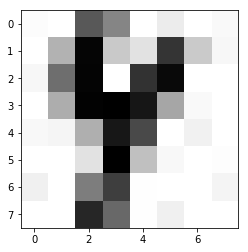

Predicted: 8.0
Actual: 4.0


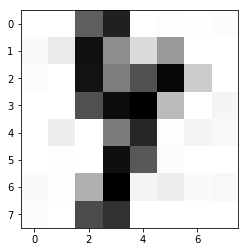

Predicted: 8.0
Actual: 4.0


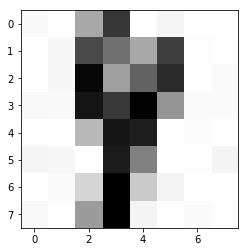

Predicted: 7.0
Actual: 4.0


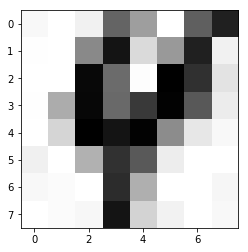

Predicted: 8.0
Actual: 7.0


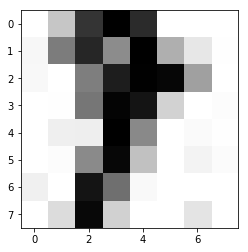

Predicted: 7.0
Actual: 3.0


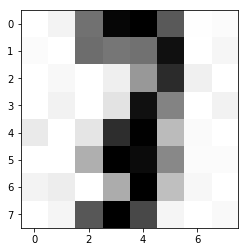

Predicted: 9.0
Actual: 1.0


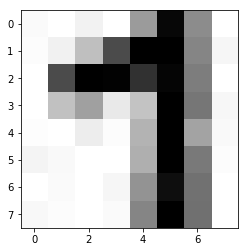

Predicted: 1.0
Actual: 6.0


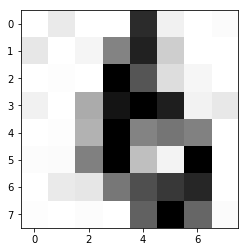

Predicted: 1.0
Actual: 8.0


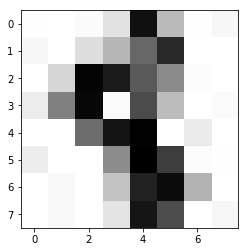

Predicted: 5.0
Actual: 9.0


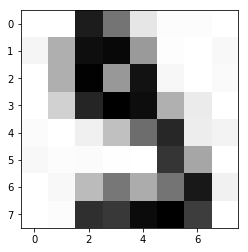

Predicted: 9.0
Actual: 1.0


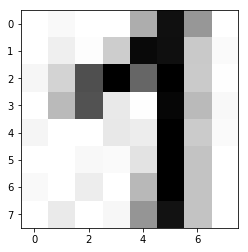

Predicted: 8.0
Actual: 9.0


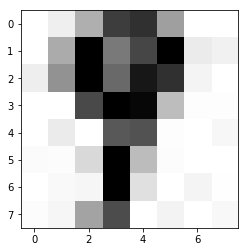

Predicted: 4.0
Actual: 0.0


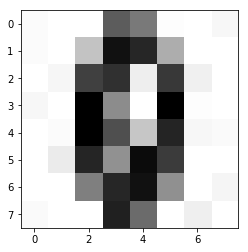

Predicted: 9.0
Actual: 4.0


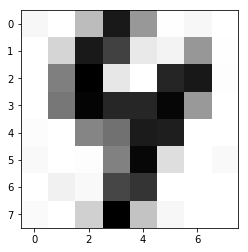

In [20]:
d = {'y_test' : y_test, 'y_predict_ann' : y_predict_ann}
allPredictions = pd.DataFrame(d, index=y_test.index, )

errors = allPredictions[allPredictions.y_test != allPredictions.y_predict_ann]

for index, row in errors.iterrows():
    img = mpimg.imread(pathToImage + str(index) + '.jpg')
    plt.imshow(img, cmap=plt.cm.gray_r,	interpolation='nearest')
    print('Predicted:', row['y_predict_ann'])
    print('Actual:', row['y_test'])
    plt.show()

# Now,	I will use	 GridSearchCV to	 find	 the	 best	 number	 of	 neurons	 for	 my	 1-hidden	 layer	network.	I will search	in	the	range	of	50-200	neurons,	and	I will use	the	 following	parameters	 for	my	 ANN:	 activation='logistic',	 solver='adam',	 alpha=1e-5,	 random_state=1,	learning_rate_init	=	0.002.

In [21]:
# define a range for the "number of neurons" in the hidden layer for a network with 1 hidden layer:
neuron_number = [(i,) for i in range(50,201)]

# create a dictionary for grid parameter:
param_grid = dict(hidden_layer_sizes = neuron_number)
print(param_grid,'\n')

# instantiate the model:
my_ANN = MLPClassifier(activation='logistic', solver='adam', 
                                         alpha=1e-5, random_state=1, 
                                           learning_rate_init = 0.002)

# creat the grid, and define the metric for evaluating the model: 
grid = GridSearchCV(my_ANN, param_grid, cv=10, scoring='accuracy', n_jobs=8)

# fit the grid (start the grid search):
%time grid.fit(X, y)

# view the results:
#print(grid.cv_results_)

# view the best results corresponding to the best structure of ANN:
print('BEST SCORE:', grid.best_score_)
print('BEST Number of Neurons:', grid.best_params_)

{'hidden_layer_sizes': [(50,), (51,), (52,), (53,), (54,), (55,), (56,), (57,), (58,), (59,), (60,), (61,), (62,), (63,), (64,), (65,), (66,), (67,), (68,), (69,), (70,), (71,), (72,), (73,), (74,), (75,), (76,), (77,), (78,), (79,), (80,), (81,), (82,), (83,), (84,), (85,), (86,), (87,), (88,), (89,), (90,), (91,), (92,), (93,), (94,), (95,), (96,), (97,), (98,), (99,), (100,), (101,), (102,), (103,), (104,), (105,), (106,), (107,), (108,), (109,), (110,), (111,), (112,), (113,), (114,), (115,), (116,), (117,), (118,), (119,), (120,), (121,), (122,), (123,), (124,), (125,), (126,), (127,), (128,), (129,), (130,), (131,), (132,), (133,), (134,), (135,), (136,), (137,), (138,), (139,), (140,), (141,), (142,), (143,), (144,), (145,), (146,), (147,), (148,), (149,), (150,), (151,), (152,), (153,), (154,), (155,), (156,), (157,), (158,), (159,), (160,), (161,), (162,), (163,), (164,), (165,), (166,), (167,), (168,), (169,), (170,), (171,), (172,), (173,), (174,), (175,), (176,), (177,), (1